# Inflation Prediction Using Global Economic Indicators (2010–2023)

**Objective:**

Predict inflation rates for various countries using global economic indicators from 2010 to 2023. This project covers data exploration, feature selection, model building, evaluation, and deployment of a simple prediction UI.

## Import Libraries

In [12]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# For deployment UI
import gradio as gr  # or use streamlit if preferred


## Load and Explore Dataset

In [13]:
# Load the dataset
df = pd.read_csv('economic_indicators_dataset_2010_2023.csv')

# Display first few rows
df.head()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


In [14]:
# Show basic info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   500 non-null    object 
 1   Country                500 non-null    object 
 2   Inflation Rate (%)     500 non-null    float64
 3   GDP Growth Rate (%)    500 non-null    float64
 4   Unemployment Rate (%)  500 non-null    float64
 5   Interest Rate (%)      500 non-null    float64
 6   Stock Index Value      500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64

## Data Cleaning

In [15]:
# Handle missing values (if any)
df = df.dropna()  # For simplicity, drop rows with missing values

# Encode categorical variables
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

# Convert 'Date' to datetime and extract year/month if useful
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Normalize/scale numeric features
features = ['Country', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value', 'Year', 'Month']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Brief explanation
print("Numeric features are scaled to have zero mean and unit variance. This helps many machine learning models perform better and ensures features are on a comparable scale.")

Numeric features are scaled to have zero mean and unit variance. This helps many machine learning models perform better and ensures features are on a comparable scale.


## Exploratory Data Analysis (EDA)

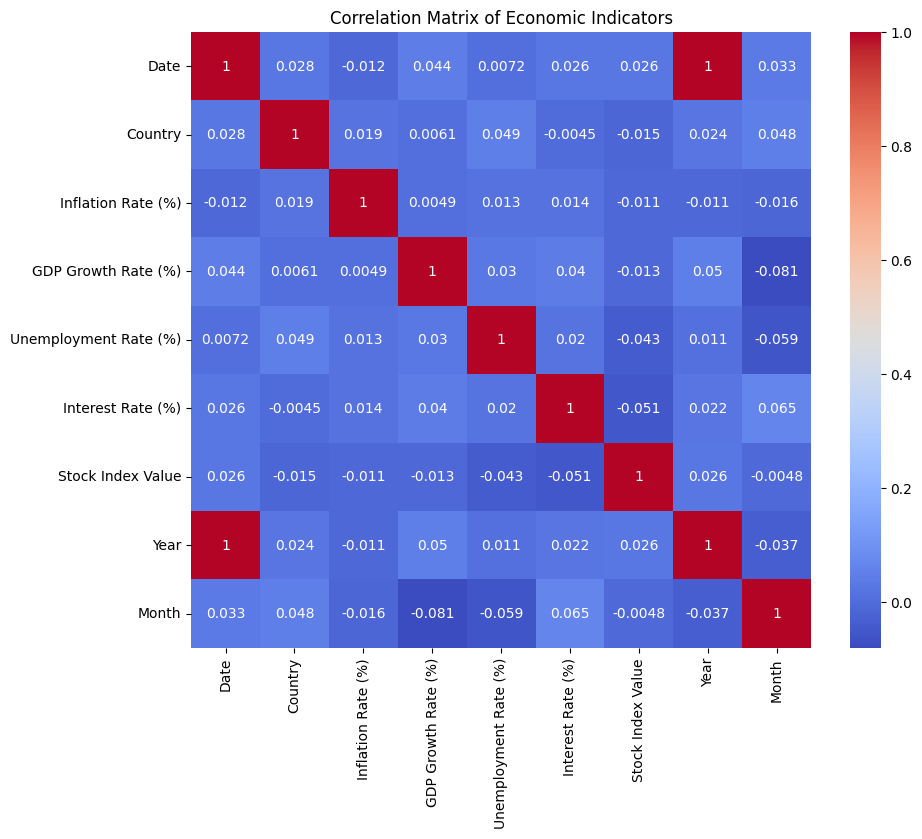

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

**Insight:** The heatmap shows the correlation between inflation and other variables. Strong correlations can indicate important predictors.

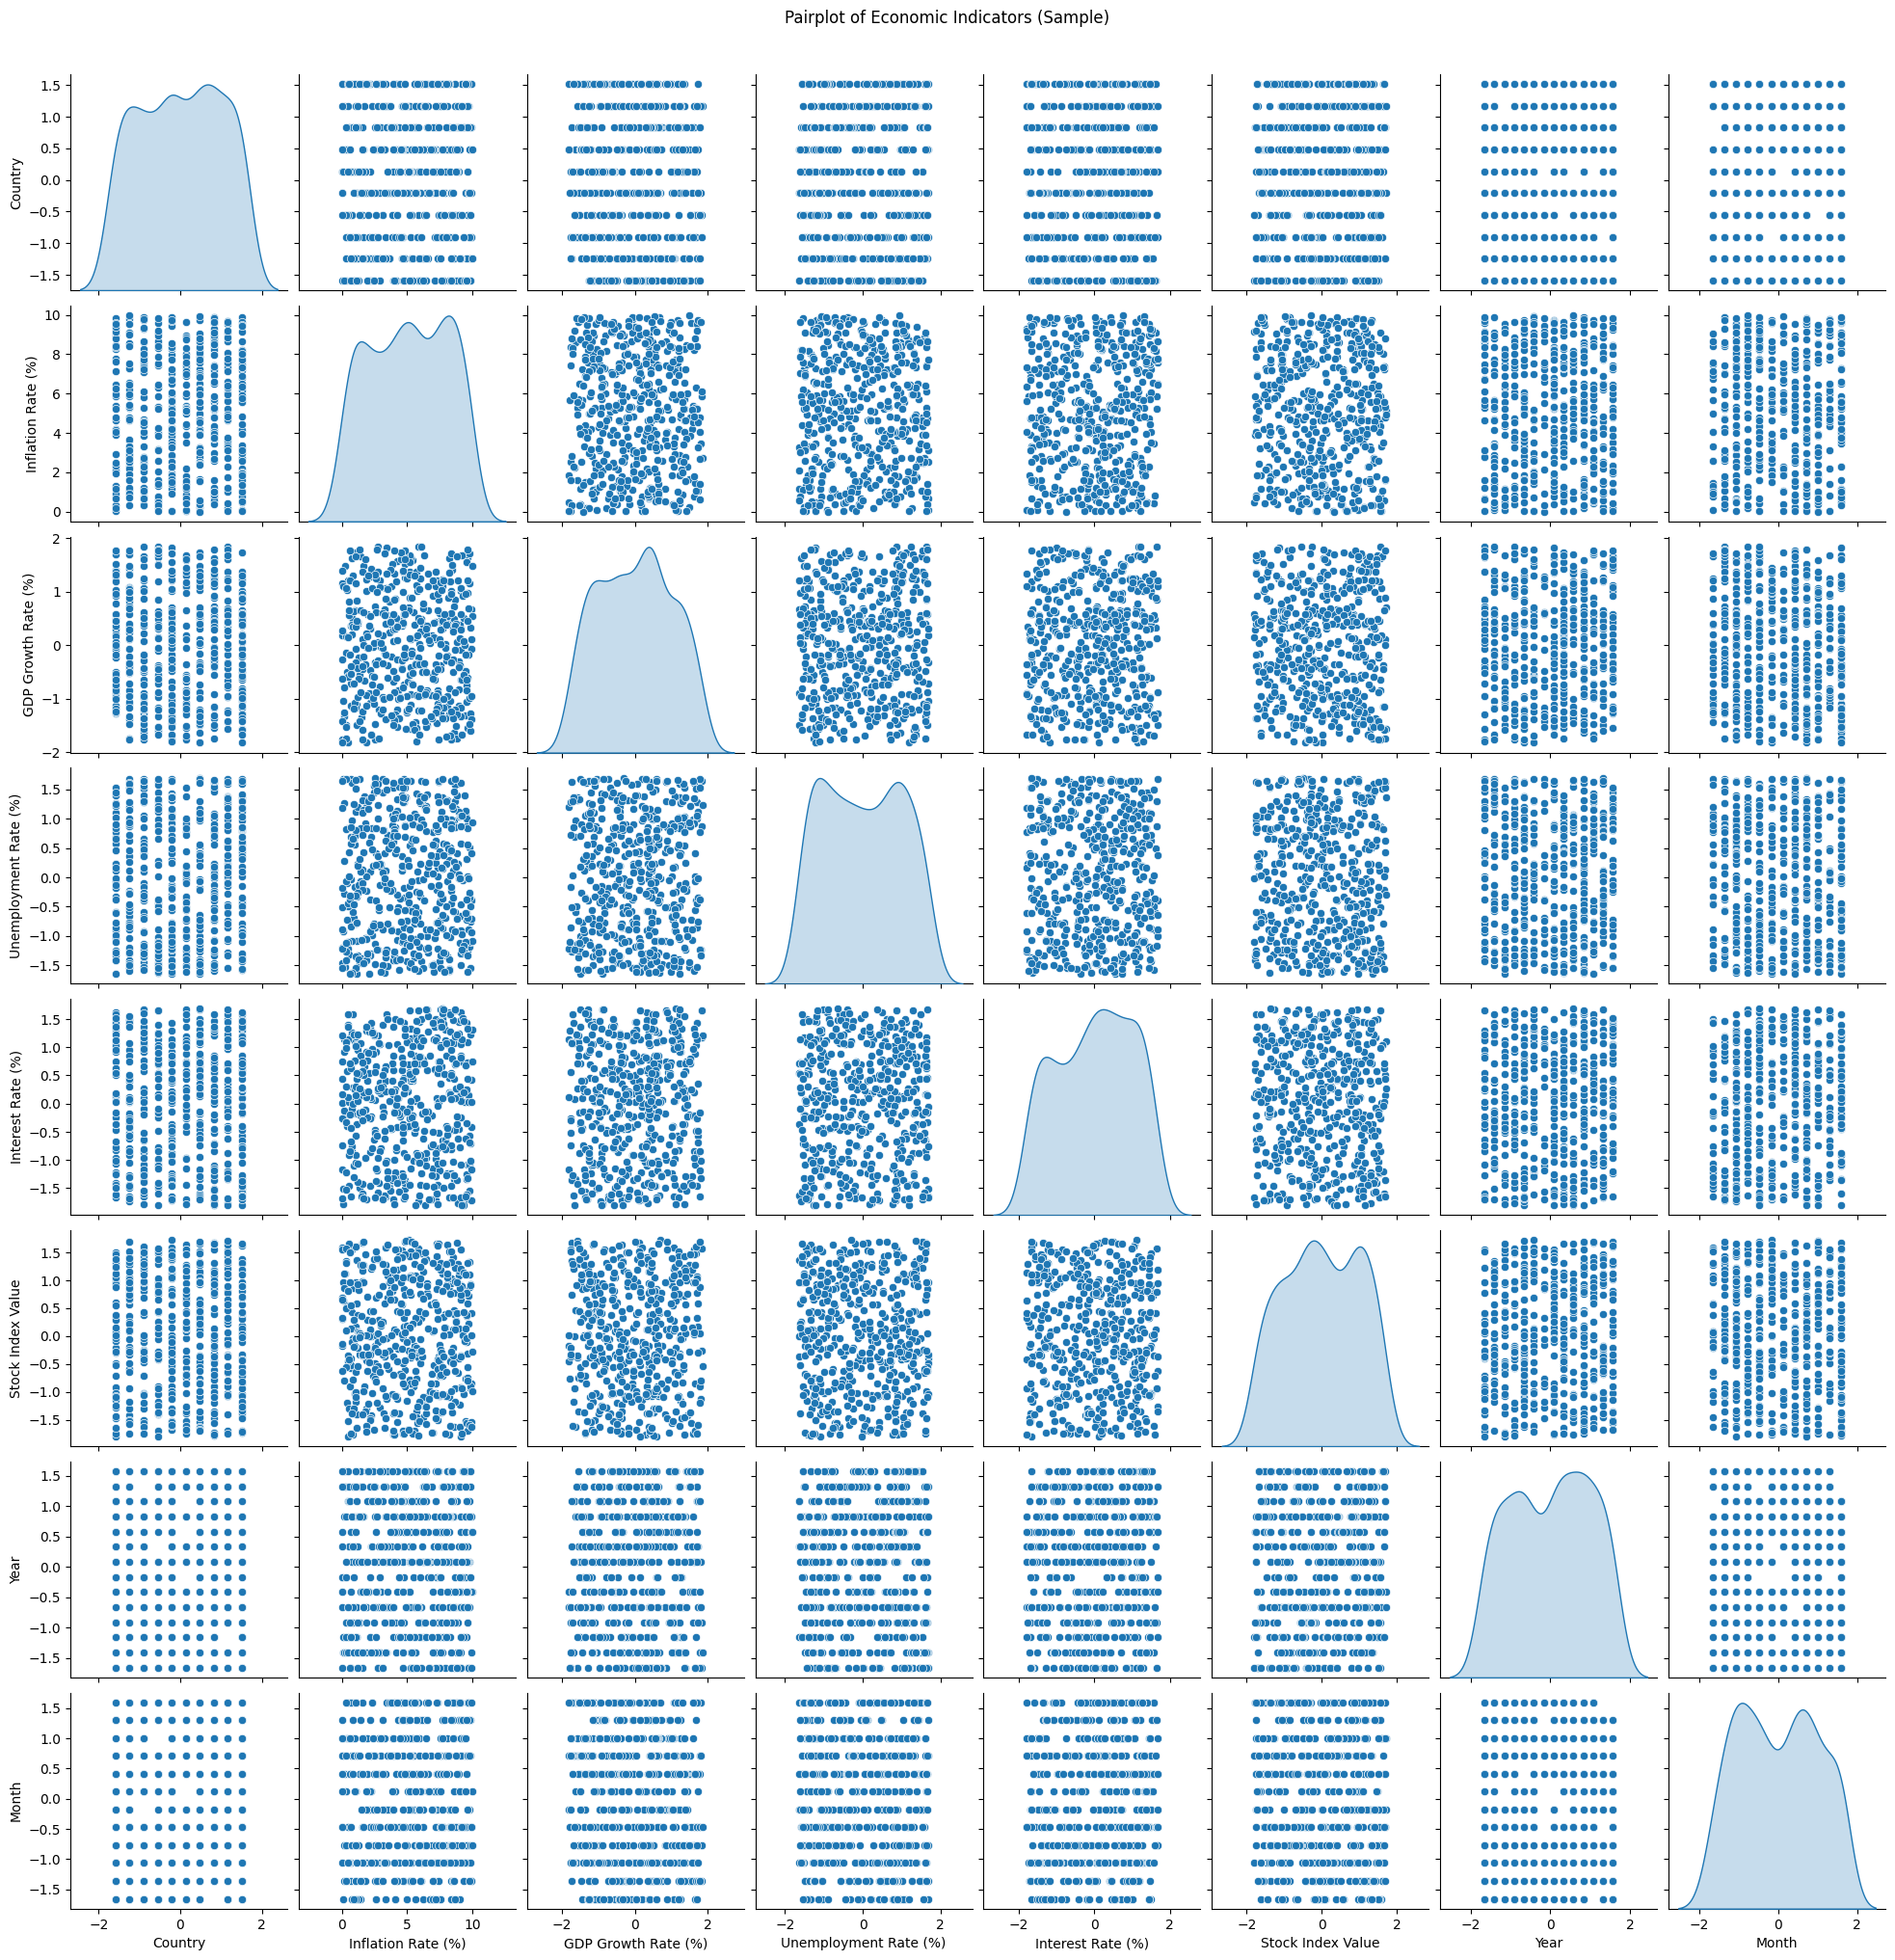

In [17]:
# Pairplot (sampled if too large)
sns.pairplot(df.sample(500), diag_kind='kde')
plt.suptitle('Pairplot of Economic Indicators (Sample)', y=1.02)
plt.show()

**Insight:** Pairplots help visualize relationships and distributions. Look for trends or clusters related to inflation.

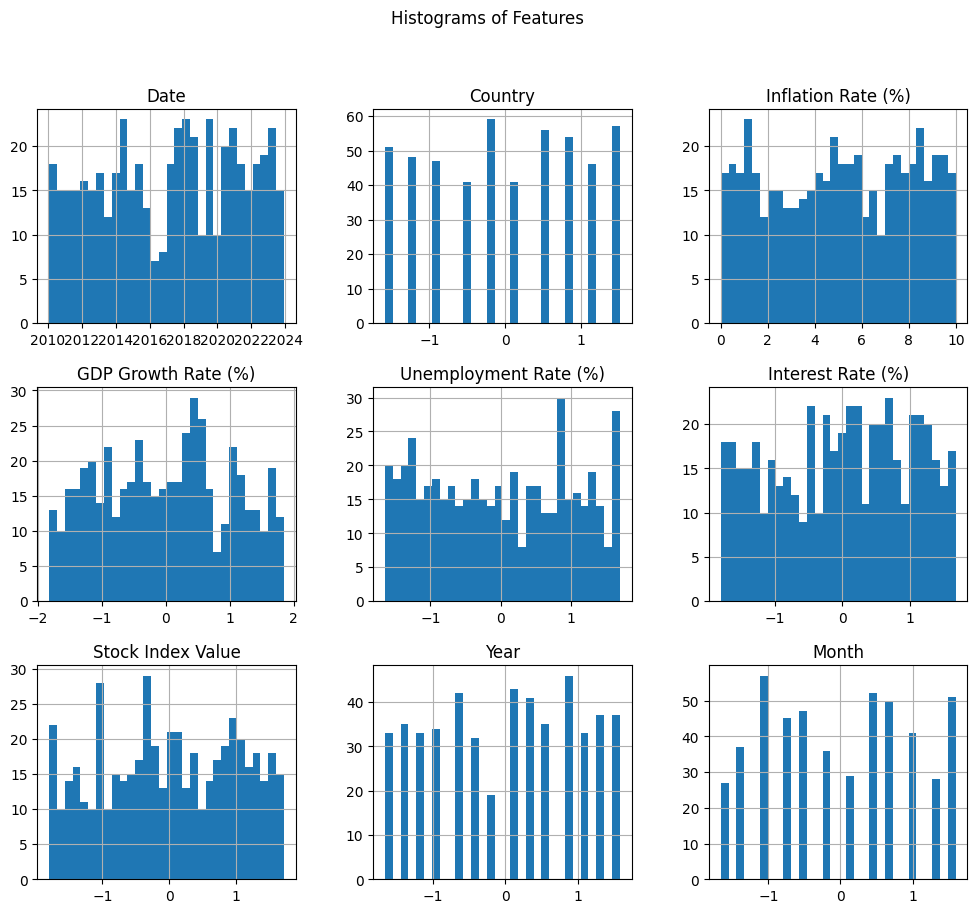

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


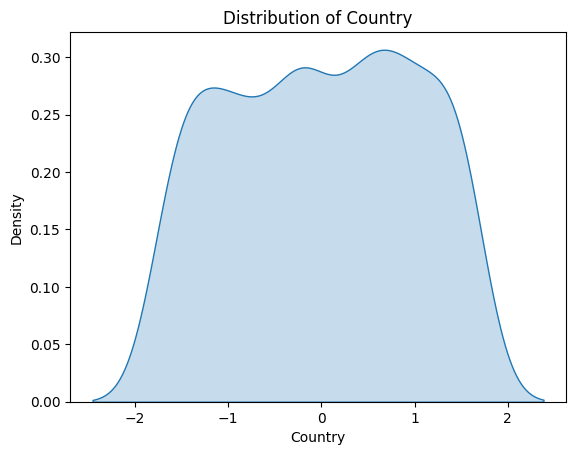

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


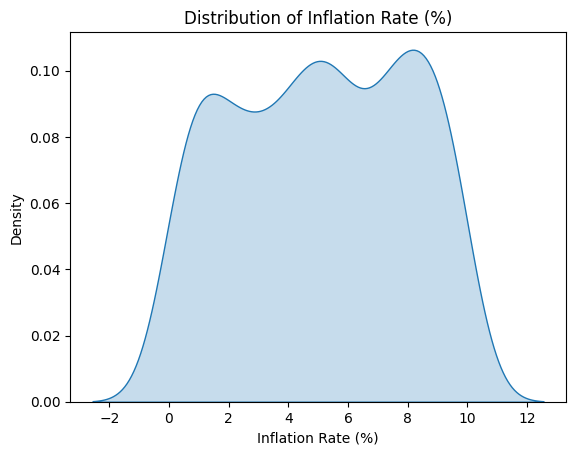

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


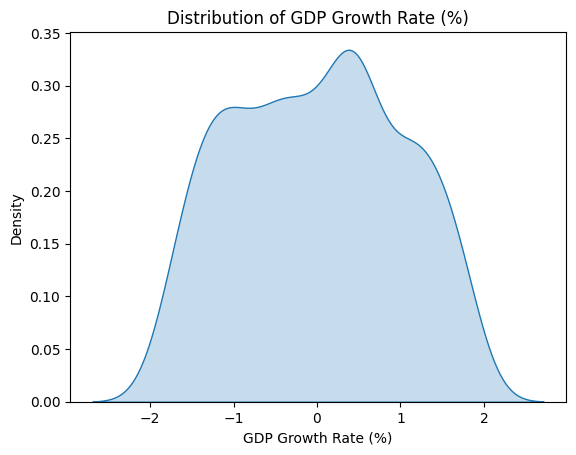

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


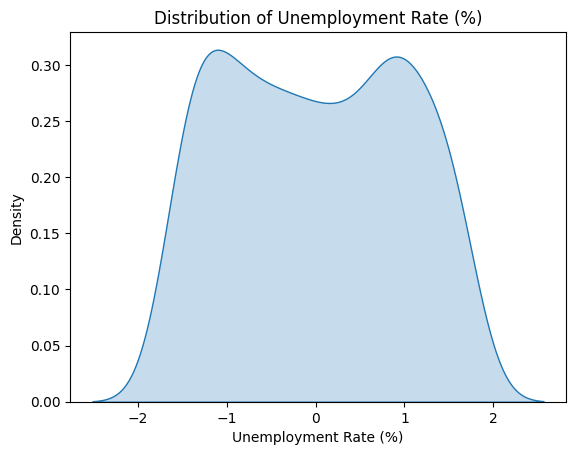

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


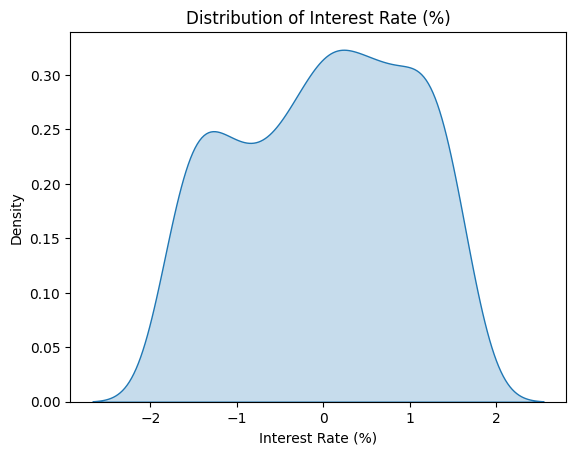

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


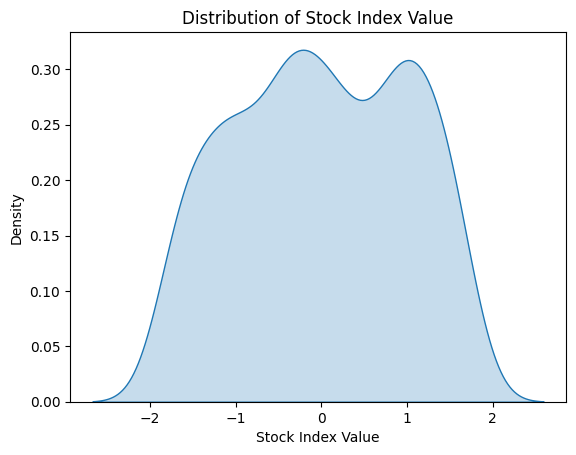

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


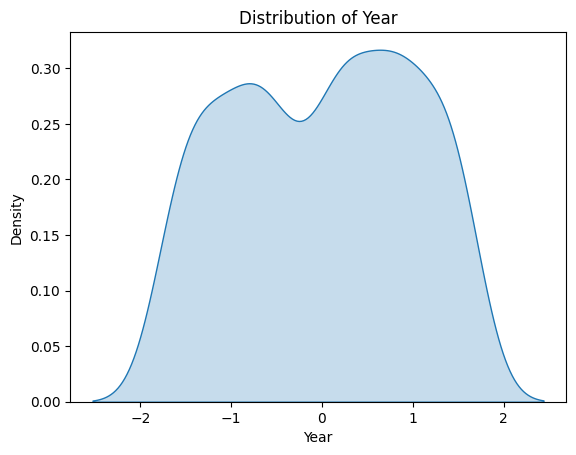

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13356\362068968.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


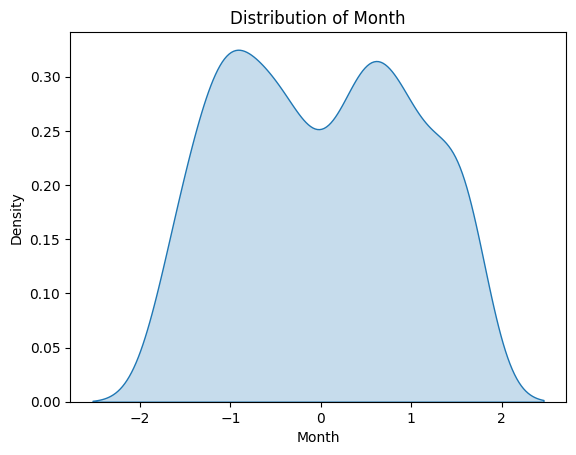

In [18]:
# Histograms / KDE plots
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Features')
plt.show()

# KDE plots
for col in df.columns:
    if df[col].dtype != 'object' and col != 'Date':
        sns.kdeplot(df[col], shade=True)
        plt.title(f'Distribution of {col}')
        plt.show()

**Insight:** These plots show the distribution of each feature and help spot skewness or outliers.

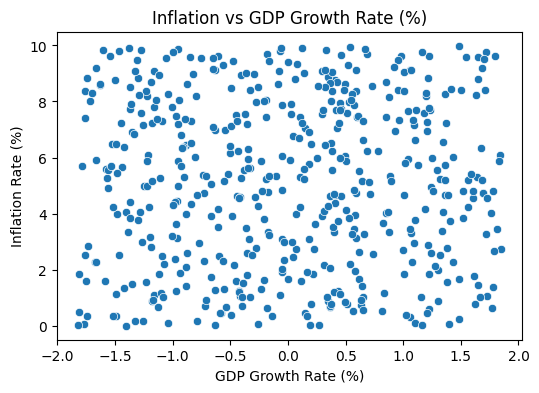

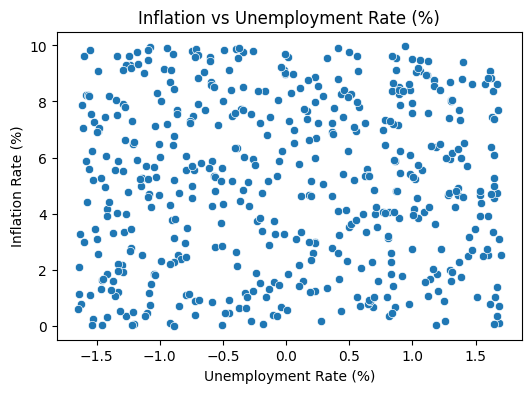

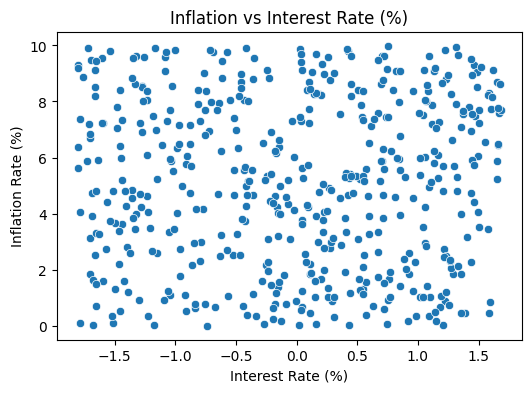

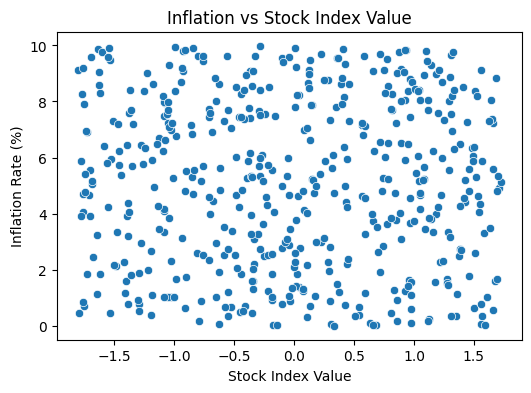

In [19]:
# Scatter plots: Inflation vs major indicators
major_features = ['GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value']
for feat in major_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feat], y=df['Inflation Rate (%)'])
    plt.title(f'Inflation vs {feat}')
    plt.xlabel(feat)
    plt.ylabel('Inflation Rate (%)')
    plt.show()

**Insight:** Scatter plots reveal the relationship between inflation and other indicators. Some may show clear trends.

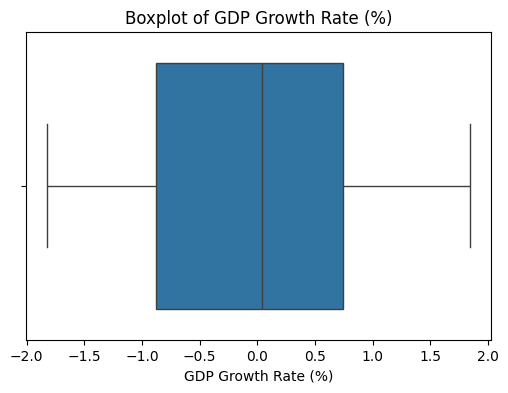

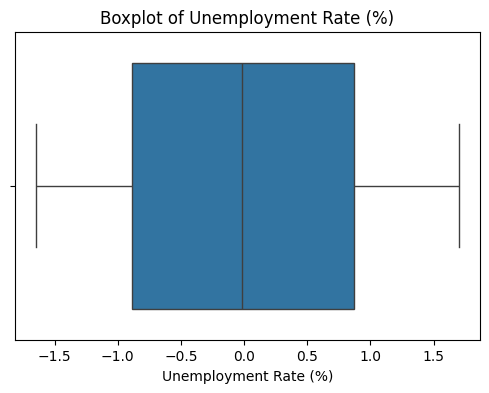

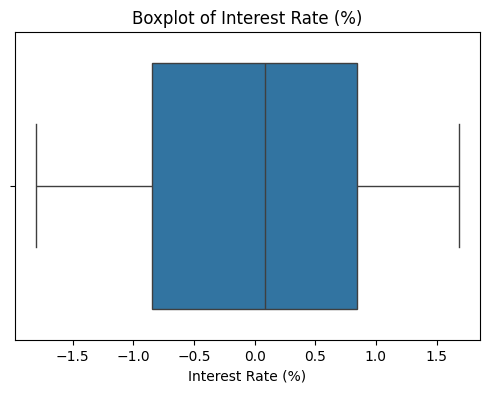

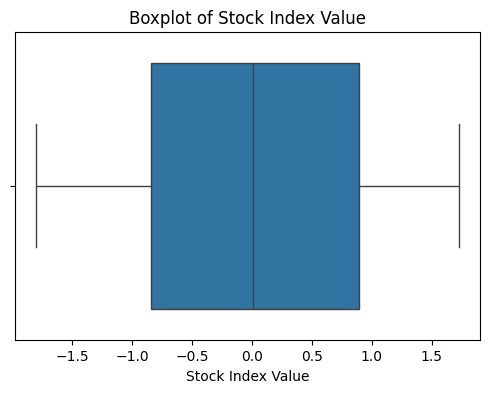

In [20]:
# Boxplots for outlier detection
for col in major_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Insight:** Boxplots help detect outliers in the data, which can affect model performance.

## Feature Selection

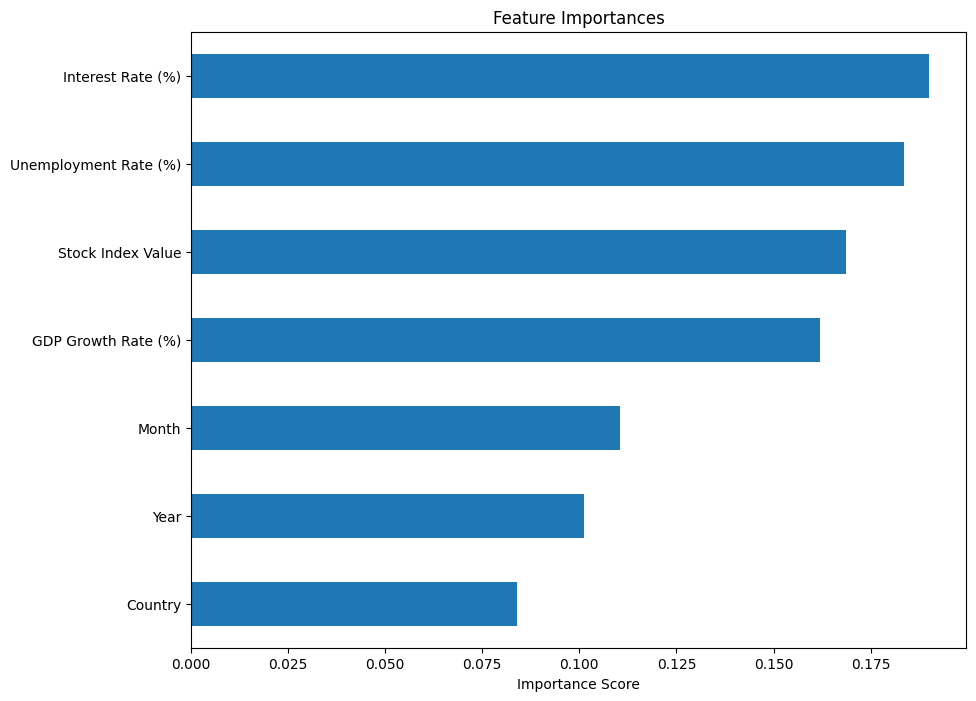

In [ ]:
# Define features and target
X = df.drop(columns=['Inflation Rate (%)'])   # All columns except target
y = df['Inflation Rate (%)']

# Drop datetime columns from X
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])

# Fit RandomForest for feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,8))
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.show()


**Explanation:** Features were selected based on their correlation with inflation and importance in a tree-based model.

## Model Building

In [22]:
# Split data
X = df[top_features]
y = df['Inflation Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}

# Display results
results_df = pd.DataFrame(results).T
display(results_df)

# Choose best model
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f'Best model: {best_model_name}')

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

## Model Interpretation

In [ ]:
# Feature importances (if tree-based)
if hasattr(best_model, 'feature_importances_'):
    pd.Series(best_model.feature_importances_, index=top_features).sort_values().plot(kind='barh')
    plt.title('Feature Importances of Best Model')
    plt.show()

# Actual vs predicted
y_pred = best_model.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Inflation')
plt.ylabel('Predicted Inflation')
plt.title('Actual vs Predicted Inflation (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Deployment UI

**How to use:** Enter values for the key economic indicators. The model will predict the expected inflation rate.

In [ ]:
# Simple Gradio UI for prediction
def predict_inflation(*inputs):
    arr = np.array(inputs).reshape(1, -1)
    arr = scaler.transform(arr)  # Use the same scaler as before
    return best_model.predict(arr)[0]

input_components = [gr.Number(label=feat) for feat in top_features]
gr.Interface(fn=predict_inflation, inputs=input_components, outputs=gr.Number(label='Predicted Inflation Rate (%)'), title='Inflation Predictor').launch()

## Conclusion and Future Work

- Built a pipeline to predict inflation using global economic indicators.
- Explored and visualized the data, selected important features, and compared several models.
- The best model was deployed as a simple UI for user interaction.

**Future improvements:**
- Incorporate more data and additional features.
- Try deep learning or time-series models.
- Improve UI and add interpretability tools.